# Vector Autoregession (VAR)

Consider a two variable VAR with one lag. We write a 2 -dimensional VAR(1) as

$$
\begin{array}{l}
y_{t}=\beta_{10}+\beta_{11} y_{t-1}+\beta_{12} x_{t-1}+v_{t}^{y} \\
x_{t}=\beta_{20}+\beta_{21} y_{t-1}+\beta_{22} x_{t-1}+v_{t}^{x}
\end{array}
$$

where $v_{t}^{y}$ and $v_{t}^{x}$ are white noise processes that may be contemporaneously correlated. The coefficient $\beta_{11}$ captures the influence of the $1$ st lag of variable $y$ on itself, while the coefficient $\beta_{12}$ captures the influence of the $1$ st lag of variable $x$ on $y$. $x$ and $y$ should be stationary. 

Forecasts are generated from a VAR in a recursive manner. The VAR generates forecasts for each variable included in the system. To illustrate the process, assume that we have fitted the 2- dimensional VAR(1) described in equations above, for all observations up to time $T$. Then the one-step-ahead forecasts are generated by

$$
\begin{array}{l}
\hat{y}_{T+1 \mid T}=\hat{\beta}_{10}+\hat{\beta}_{11} y_{T}+\hat{\beta}_{12} x_{T} \\
\hat{x}_{T+1 \mid T}=\hat{\beta}_{20}+\hat{\beta}_{21} y_{T}+\hat{\beta}_{22} x_{T}
\end{array}
$$

There are two decisions one has to make when using a VAR to forecast, namely how many variables (denoted by $K$ ) and how many lags (denoted by $p$ ) should be included in the system. The number of coefficients to be estimated in a VAR is equal to $K+p K^{2}$ (or $1+p K$ per equation). For example, for a VAR with $K=5$ variables and $p=3$ lags, there are 16 coefficients per equation, giving a total of 80 coefficients to be estimated.

**For more details, check Principles of Econometrics, Chapter 13**

http://zalamsyah.staff.unja.ac.id/wp-content/uploads/sites/286/2019/11/7-Principles-of-Econometrics-4th-Ed.-R.Carter-Hill-et.al_.-1.pdf

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

mdata = sm.datasets.macrodata.load_pandas().data

In [2]:
mdata

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [3]:
# prepare the dates index
dates = mdata[['year', 'quarter']].astype(int).astype(str)

quarterly = dates["year"] + "Q" + dates["quarter"]

from statsmodels.tsa.base.datetools import dates_from_str

quarterly = dates_from_str(quarterly)

mdata = mdata[['realgdp','realcons','realinv']]

mdata.index = pd.DatetimeIndex(quarterly)

In [4]:
mdata

,realgdp,realcons,realinv
1959-03-31,2710.349,1707.4,286.898
1959-06-30,2778.801,1733.7,310.859
1959-09-30,2775.488,1751.8,289.226
1959-12-31,2785.204,1753.7,299.356
1960-03-31,2847.699,1770.5,331.722
...,...,...,...
2008-09-30,13324.600,9267.7,1990.693
2008-12-31,13141.920,9195.3,1857.661
2009-03-31,12925.410,9209.2,1558.494
2009-06-30,12901.504,9189.0,1456.678


<AxesSubplot:>

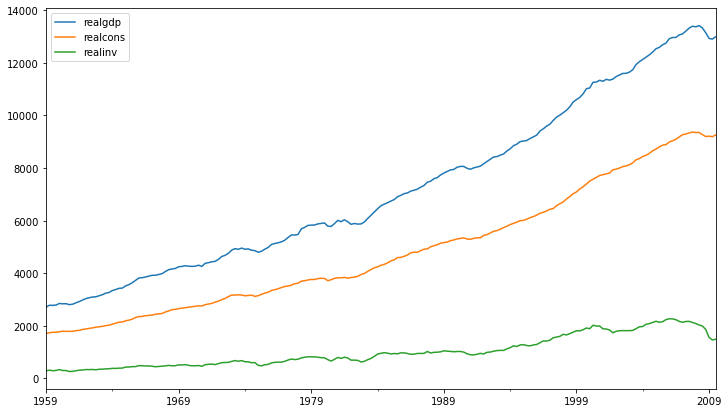

In [5]:
mdata.plot(figsize = [12,7])

In [6]:
data = np.log(mdata).diff().dropna()

<AxesSubplot:>

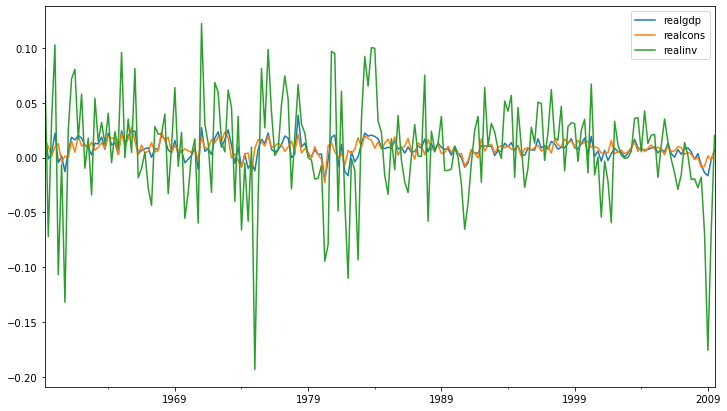

In [7]:
data.plot(figsize = [12,7])

In [8]:
# make a VAR model
model = VAR(data)

C:\Users\abuta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'


In [11]:
results = model.fit(2)      # lags of the VAR model
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 11, Apr, 2022
Time:                     15:50:09
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.172
L1.realgdp         -0.279435         0.169663           -1.647           0.100
L1.realcons         0.675016         0.131285            5.142    

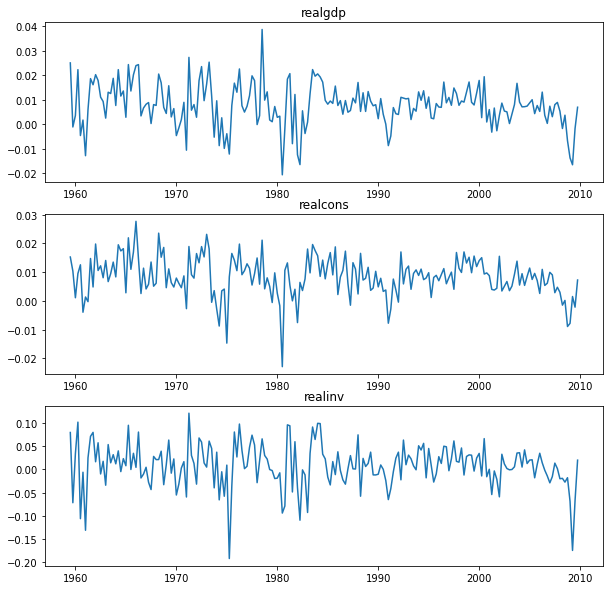

In [12]:
results.plot(); # plot series directly from results

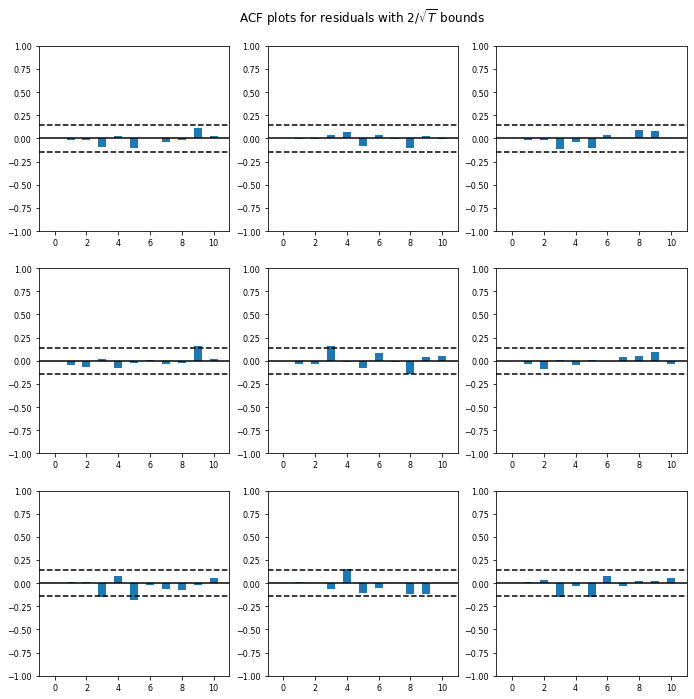

In [13]:
results.plot_acorr();

In [14]:
model.select_order(15) # oreder selection

In [15]:
results = model.fit(maxlags=15, ic='aic')

In [16]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 11, Apr, 2022
Time:                     15:51:07
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.4257
Nobs:                     199.000    HQIC:                  -27.7212
Log likelihood:           1961.15    FPE:                7.47593e-13
AIC:                     -27.9222    Det(Omega_mle):     6.45336e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001281         0.001295            0.989           0.322
L1.realgdp         -0.286148         0.171582           -1.668           0.095
L1.realcons         0.673869         0.132245            5.096    

In [17]:
lag_order = results.k_ar  # number of lags entering the model

results.forecast(data.values[-lag_order:], 5)

array([[ 0.00616044,  0.00500006,  0.00916198],
       [ 0.00427559,  0.00344836, -0.00238478],
       [ 0.00416634,  0.0070728 , -0.01193629],
       [ 0.00557873,  0.00642784,  0.00147152],
       [ 0.00626431,  0.00666715,  0.00379567]])

In [18]:
data.values[-lag_order:]

array([[-0.01661198,  0.0015105 , -0.1755982 ],
       [-0.00185125, -0.00219587, -0.06756147],
       [ 0.00686219,  0.00726487,  0.02019724]])

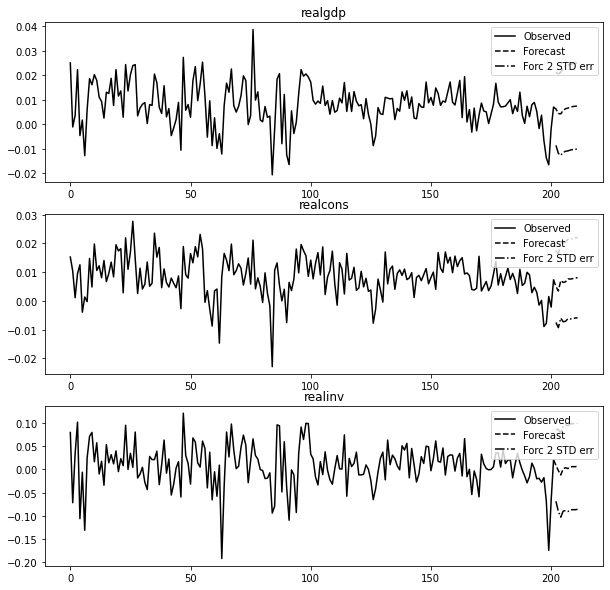

In [19]:
results.plot_forecast(10);

# Impulse Resposne Functions (IRF)

\begin{array}{l}
y_{t}=\delta_{10}+\delta_{11} y_{t-1}+\delta_{12} x_{t-1}+v_{t}^{y} \\
x_{t}=\delta_{20}+\delta_{21} y_{t-1}+\delta_{22} x_{t-1}+v_{t}^{x}
\end{array}

Consider the case when there is a one-standard deviation shock (alternatively called an innovation) to $y$ so that at time $t=1, v_{1}^{y}=\sigma_{y}$, and $v_{t}^{y}$ is zero thereafter. Assume $v_{t}^{x}=0$ for all $t .$ It is traditional to consider a standard deviation shock (innovation) rather than a unit shock to overcome measurement issues. Assume $y_{0}=x_{0}=0 .$ Also, since we are focusing on how a shock changes the paths of $y$ and $x$, we can ignore the intercepts. Then
1. When $t=1$, the effect of a shock of size $\sigma_{y}$ on $y$ is $y_{1}=v_{1}^{y}=\sigma_{y}$, and the effect on $x$

$$
\text { is } x_{1}=v_{1}^{x}=0 \text { . }
$$

2. When $t=2$, the effect of the shock on $y$ is

$$
y_{2}=\delta_{11} y_{1}+\delta_{12} x_{1}=\delta_{11} \sigma_{y}+\delta_{12} 0=\delta_{11} \sigma_{y}
$$

and the effect on $x$ is

$$
x_{2}=\delta_{21} y_{1}+\delta_{22} x_{1}=\delta_{21} \sigma_{y}+\delta_{22} 0=\delta_{21} \sigma_{y}
$$

3. When $t=3$, the effect of the shock on $y$ is

$$
y_{3}=\delta_{11} y_{2}+\delta_{12} x_{2}=\delta_{11} \delta_{11} \sigma_{y}+\delta_{12} \delta_{21} \sigma_{y}
$$

and the effect on $x$ is

$$
x_{3}=\delta_{21} y_{2}+\delta_{22} x_{2}=\delta_{21} \delta_{11} \sigma_{y}+\delta_{22} \delta_{21} \sigma_{y}
$$

By repeating the substitutions for $t=4,5, \ldots$, we obtain further expressions. The impulse response of the shock (or innovation) to $y$ on $y$ is $\sigma_{y}\left\{1, \delta_{11},\left(\delta_{11} \delta_{11}+\delta_{12} \delta_{21}\right), \ldots\right\}$ and the impulse response of a shock to $y$ on $x$ is $\sigma_{y}\left\{0, \delta_{21},\left(\delta_{21} \delta_{11}+\delta_{22} \delta_{21}\right), \ldots\right\} .$

**For further reference, check Principles of Econometrics, Chapter 13**

http://zalamsyah.staff.unja.ac.id/wp-content/uploads/sites/286/2019/11/7-Principles-of-Econometrics-4th-Ed.-R.Carter-Hill-et.al_.-1.pdf

In [18]:
irf = results.irf(20)  # impulse response

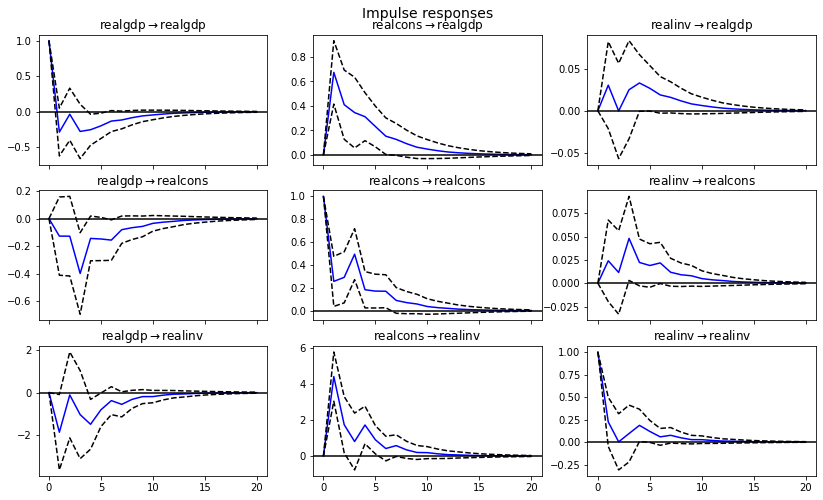

In [19]:
irf.plot(orth=False,figsize = [12,7]);

### Example from Statmodels

https://www.statsmodels.org/dev/vector_ar.html

# Example 2

Log of real personal disposable
income (denoted as Y) and log of real personal consumption expenditure (denoted as C) for
the U.S. economy over the period 1960:1 to 2009:4. 

In [20]:
fred = pd.read_excel('fred.xlsx') 

In [21]:
fred.head()

,c,y
0,7.479017,7.578401
1,7.491590,7.583807
2,7.487622,7.584671
3,7.488965,7.584061
4,7.488685,7.593122


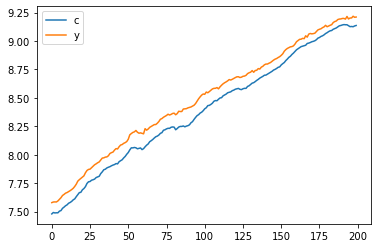

In [22]:
fred.plot()

In [23]:
fred_d = fred.diff().dropna()
fred_d.head()

,c,y
1,0.012573,0.005406
2,-0.003968,0.000864
3,0.001343,-0.000610
4,-0.000280,0.009061
5,0.014770,0.014955


In [38]:
# make a VAR model
model = VAR(fred_d)

C:\Users\Aram\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [39]:
results = model.fit(1)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 19, Apr, 2021
Time:                     23:05:48
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -19.6614
Nobs:                     198.000    HQIC:                  -19.7207
Log likelihood:           1400.44    FPE:                2.61750e-09
AIC:                     -19.7611    Det(Omega_mle):     2.53995e-09
--------------------------------------------------------------------
Results for equation c
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.005278         0.000757            6.969           0.000
L1.c          0.215607         0.074749            2.884           0.004
L1.y          0.149380         0.057734            2.587           0.010

Results for equation y

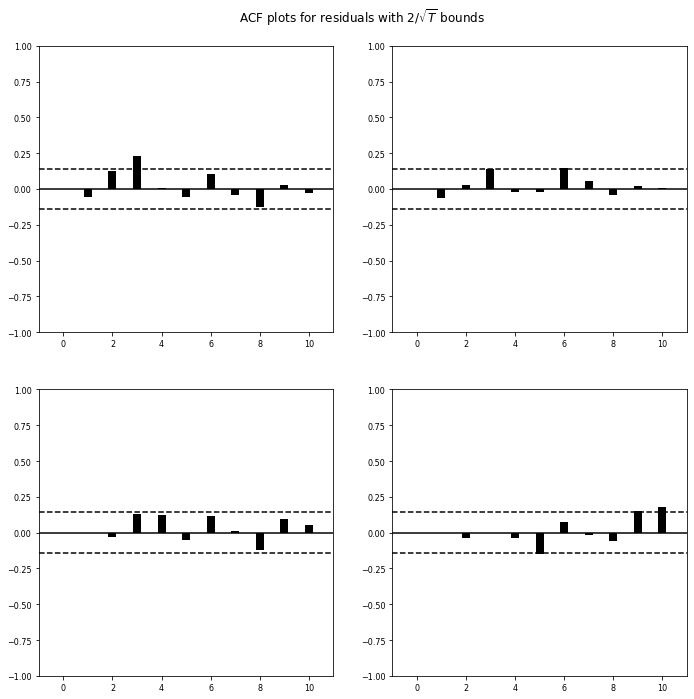

In [42]:
results.plot_acorr();

In [26]:
irf = results.irf(20)  # impulse response

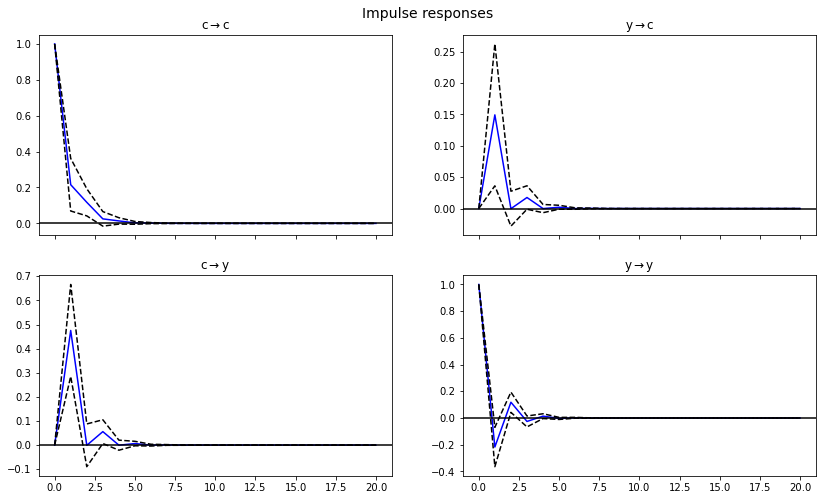

In [27]:
irf.plot(orth=False,figsize = [12,7]);

#### Two panels on the left show impulse response functions of expenditure, right two panels show impulse response functions of disposible income. 

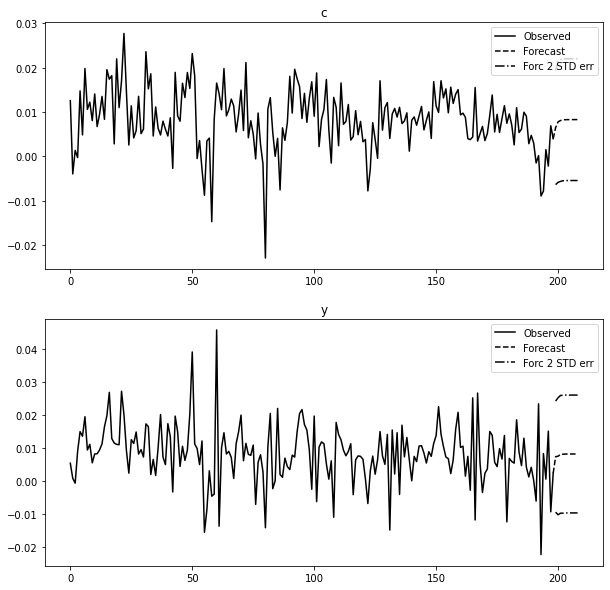

In [28]:
results.plot_forecast(10); # Forecasting and visualization 10 periods ahead

### One can choose the model by automatically minimizing AIC

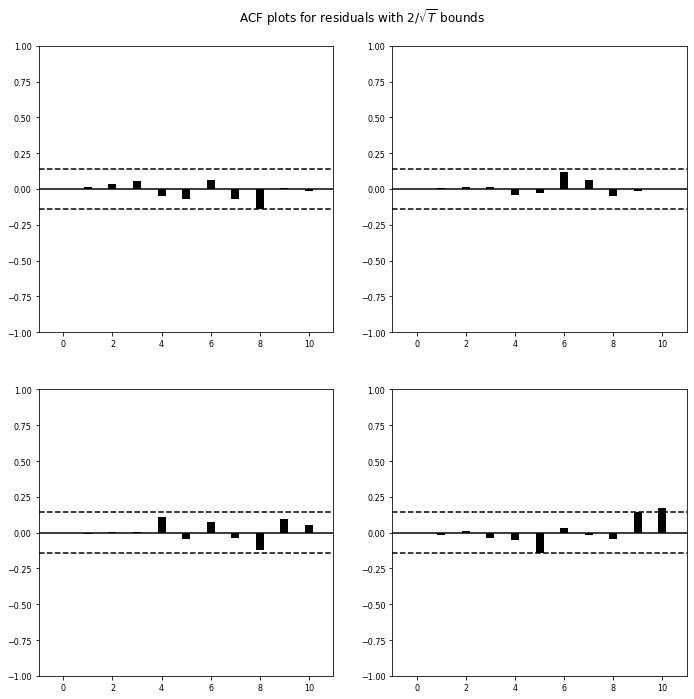

In [37]:
results.plot_acorr();